
=== Top 10 Startups by Total Funding (in USD) ===
        Company  Funding Amount in $
   Reliance Jio          24767620475
       Flipkart           9009184737
Reliance Retail           6419310306
          One97           4432652051
            Ola           3808672049
            OYO           3439351106
    ReNew Power           2776179257
         BYJU’S           2745964432
         Swiggy           2428380000
         Zomato           2100568357

=== Summary Metrics ===
Highest Funded Startup : Reliance Jio
Lowest Funded Startup  : Zomato
Average Funding (Top 10): 6192788277.0 USD


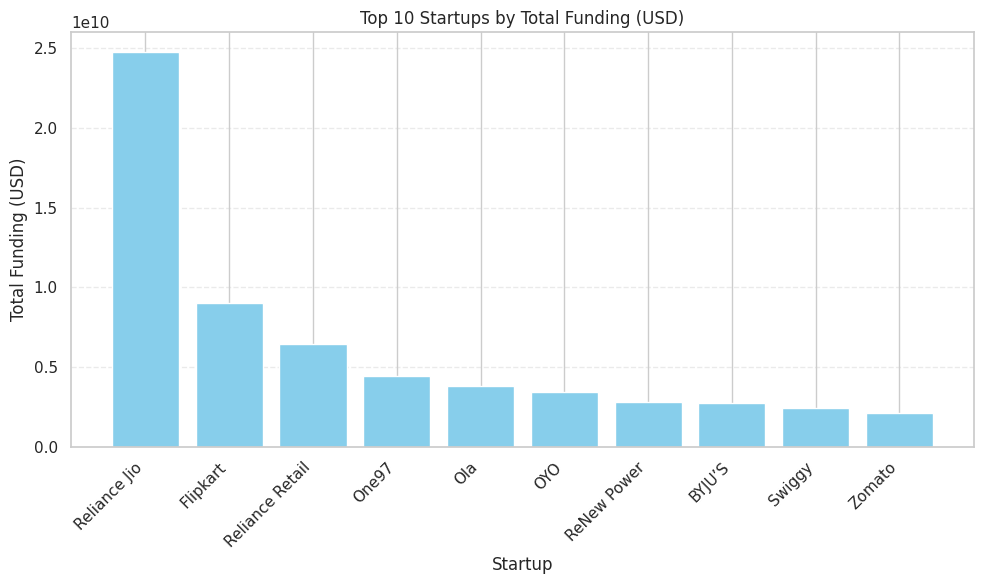

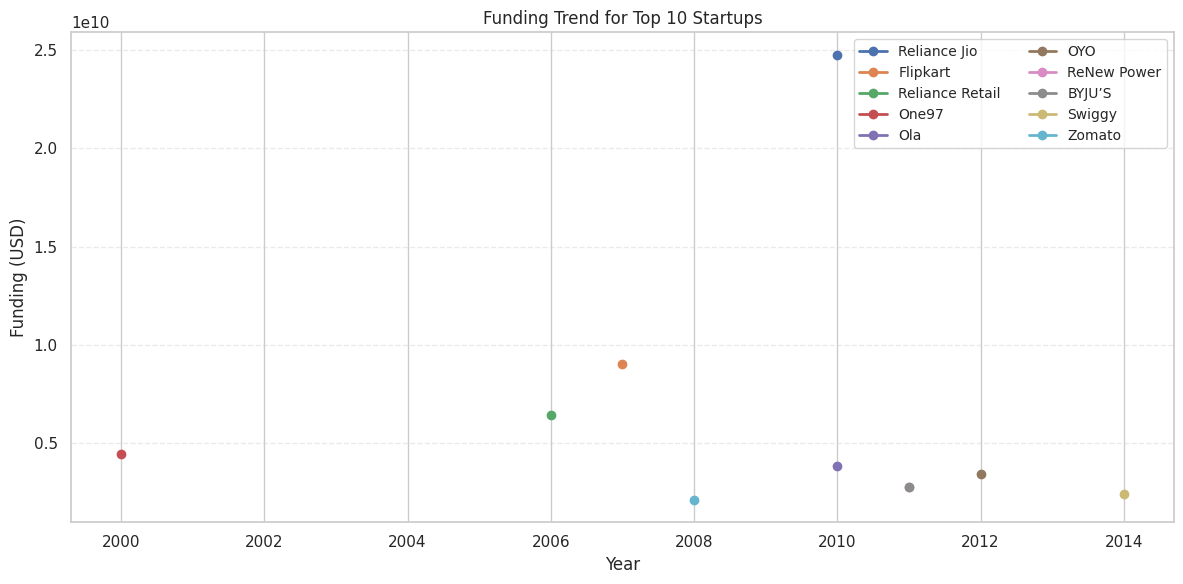

KeyError: 'Industry'

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Startups1.csv")
df['Funding Amount in $'] = pd.to_numeric(df['Funding Amount in $'], errors='coerce').fillna(0)
df['YearMonth'] = pd.to_datetime(df['Starting Year'].astype(str) + "-01-01")

top10 = df.sort_values(by='Funding Amount in $', ascending=False).head(10).copy()

best_startup = top10.iloc[0]['Company']
worst_startup = top10.iloc[-1]['Company']
avg_funding = top10['Funding Amount in $'].mean().round(2)

print("\n=== Top 10 Startups by Total Funding (in USD) ===")
print(top10[['Company', 'Funding Amount in $']].to_string(index=False))

print("\n=== Summary Metrics ===")
print(f"Highest Funded Startup : {best_startup}")
print(f"Lowest Funded Startup  : {worst_startup}")
print(f"Average Funding (Top 10): {avg_funding} USD")

plt.figure(figsize=(10,6))
plt.bar(top10['Company'], top10['Funding Amount in $'], color='skyblue')
plt.title("Top 10 Startups by Total Funding (USD)")
plt.xlabel("Startup")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
for startup in top10['Company']:
    temp = df[df['Company'] == startup]
    plt.plot(temp['YearMonth'], temp['Funding Amount in $'], marker='o', linewidth=2, label=startup)
plt.title("Funding Trend for Top 10 Startups")
plt.xlabel("Year")
plt.ylabel("Funding (USD)")
plt.legend(fontsize='small', ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

industries = top10.groupby('Industry').size()
plt.figure(figsize=(6,6))
plt.pie(industries, labels=industries.index, autopct='%1.1f%%', startangle=140)
plt.title("Industry Distribution among Top 10 Startups")
plt.tight_layout()
plt.show()